In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [7]:
data = pd.read_csv("../data/train.csv")

#### Checking the data 

In [8]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#### About the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking the correlation of data 

In [10]:
correlation = data.corr()
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

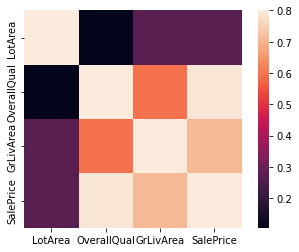

In [11]:
sns.heatmap(data[['LotArea', 'Neighborhood', 'OverallQual','GrLivArea','SalePrice']].corr(), vmax=.8, square=True)

##### Plotting Quality Vs Sale Price

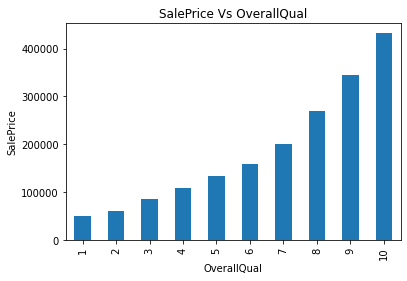

In [12]:
data.groupby(data['OverallQual'])['SalePrice'].median().plot.bar()
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('SalePrice Vs OverallQual')
plt.show()

##### Plotting GarageCars Vs Sale Price

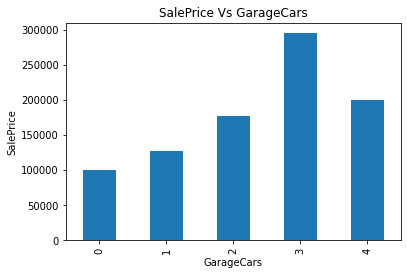

In [13]:
data.groupby(data['GarageCars'])['SalePrice'].median().plot.bar()
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('SalePrice Vs GarageCars')
plt.show()

##### Plotting GrLivArea Vs Sale Price

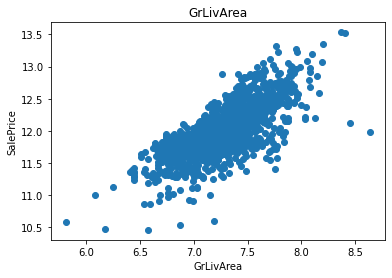

In [14]:
data['GrLivArea'] = np.log(data['GrLivArea'])
data['SalePrice'] = np.log(data['SalePrice'])
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea')
plt.show()

##### Plotting GarageArea Vs Sale Price

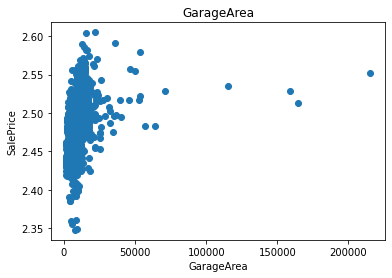

In [15]:
data['GarageArea'] = np.log(data['LotArea'])
data['SalePrice'] = np.log(data['SalePrice'])
plt.scatter(data['LotArea'], data['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GarageArea')
plt.show()

#### Trainining a multiple linear regression with these four features i.e 2 Categorical and 2 Continuous  

##### Selecting GarageArea, GarageCars, OverallQual, GrLivArea for training and testing respective of SalePrice

In [16]:
X = data[['GarageArea', 'GarageCars', 'OverallQual','GrLivArea']]
y = data['SalePrice'].values.reshape(-1,1)

##### Encoding Categorical Variables

In [17]:
X = pd.get_dummies(X, columns=['GarageCars','OverallQual'], prefix=['GarageCars_','OverallQual_'])
X.head()

,GarageArea,GrLivArea,GarageCars__0,GarageCars__1,GarageCars__2,GarageCars__3,GarageCars__4,OverallQual__1,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,OverallQual__10
0,9.041922,7.444249,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,9.169518,7.140453,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,9.328123,7.487734,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,9.164296,7.448334,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,9.565214,7.695303,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


###### Splitting the data using sklearn train_test_split, taking test_size 25% with random_state of 0

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

##### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['GarageArea', 'GrLivArea']] = scaler.fit_transform(X_train[['GarageArea', 'GrLivArea']])
X_train[['GarageArea', 'GrLivArea']].head(5)

,GarageArea,GrLivArea
1292,-0.624082,1.498898
1018,0.330061,0.066611
1213,0.230611,-1.216574
1430,1.709393,0.733223
810,0.210402,-0.285699


###### Model Fitting Using LinearRegression

In [20]:
reg_multiple = LinearRegression()
reg_multiple.fit(X, y)

print('The interception is' , reg_multiple.intercept_)
print('The coefficient is' , reg_multiple.coef_)

The interception is [2.1970928]
The coefficient is [[ 0.00959619  0.02639153 -0.01723309 -0.00704639  0.00248569  0.01102457
   0.01076923 -0.0522033  -0.05756945 -0.03427311 -0.01392181 -0.00163949
   0.00710217  0.01986124  0.03415632  0.05058531  0.04790211]]


In [26]:
y_pred = reg_multiple.predict(X_val)

In [22]:
def compute_rmsle(y_val: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    return round(rmsle, precision)

In [23]:
compute_rmsle(y_val, y_pred)

0.0

In [24]:
def evaluate_regression(y_test, y_pred):
    print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
    print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))
    print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
    print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))

In [25]:
evaluate_regression(y_pred, y_val)

Mean square error (MSE): 0.00
Root mean square error (RMSE): 0.01
Mean absolute error (MAE): 0.01
Coefficient of determination (R^2): 0.78
